# 1. Introduction
### Overview
This week's project requires us to implement a Naive Bayes classifier on the Spambase dataset. Once we conduct the experiments, we will calculate the resulting metrics.

### 1.1 Research Question
We are expected to use Naive Bayes to predict whether a message is marked as spam or not.

### 1.2 Metric for Success
Our model would be considered a success if it is able to compute an accuracy score of at least 80%. 

### 1.3 Context
This dataset is from UCI machine learning repository, and we're going to use it to classiy whether an email is spam or not.
Source: https://archive.ics.uci.edu/ml/datasets/Spambase

### 1.4 Experimental Design
1. Prepare dataset(s) and clean them
2. Carry out EDA
3. Carry out modelling using Naive Bayes
4. Optimize the Naive Bayes models
5. Challenge the Solution
6. Document everything.

### 1.5 Appropriateness of Data


# 2. Data Preparation and Cleaning

In [1]:
# loading basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# geting the names from the spambase.names file
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

data = pd.read_csv('spambase.data', names = names)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# previewing dataset shape
data.shape

(4601, 58)

There are 4,601 rows (including the header) and 58 columns in this dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

We see that this dataset has floating point values apart from the last three columns which are of type integer. We also see that there are no missing values so there's no need to perform any cleaning.

In [5]:
data = data.drop_duplicates()
data.shape

(4210, 58)

391 duplicated records have been dropped.

In [6]:
# setting the 'spam' column as type category
data = data.astype({'spam' : 'category'})

# confirming the data type has been changed
data.spam.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

# 3. Exploratory Data Analysis

In [7]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


0    2531
1    1679
Name: spam, dtype: int64


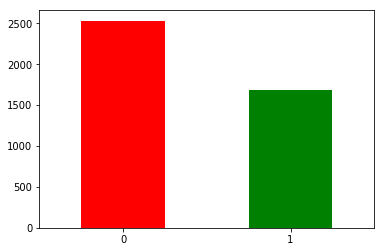

In [8]:
# checking how many are spam and how many are not
data.spam.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green'])
print(data.spam.value_counts())

Messages not marked spam outnumber those marked spam 2531 to 1679.

In [9]:
# selecting random variables to view their distributions since there are too many variables
# to do them all
import random
dist = random.sample(names, k = 9)
dist

['char_freq_!',
 'word_freq_3d',
 'word_freq_report',
 'char_freq_#',
 'word_freq_415',
 'word_freq_over',
 'word_freq_lab',
 'word_freq_email',
 'word_freq_conference']

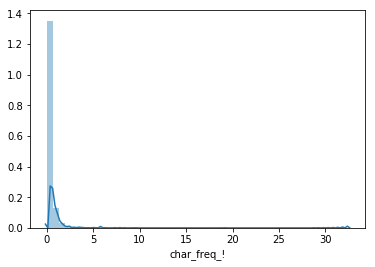

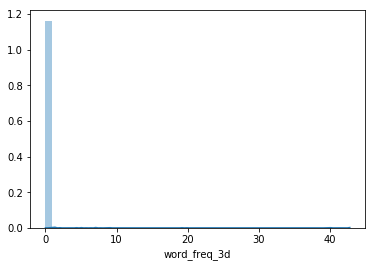

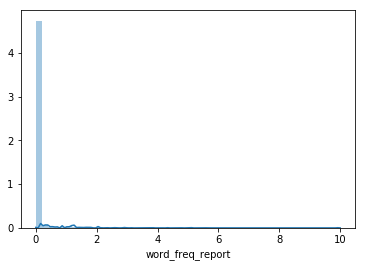

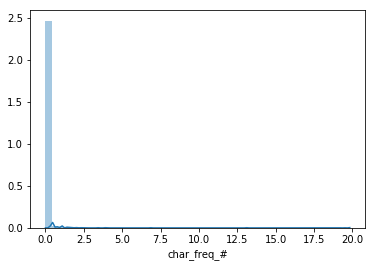

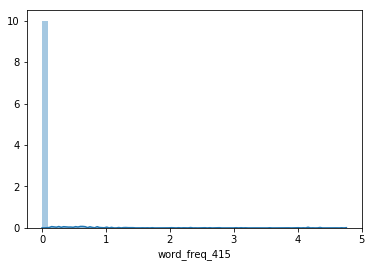

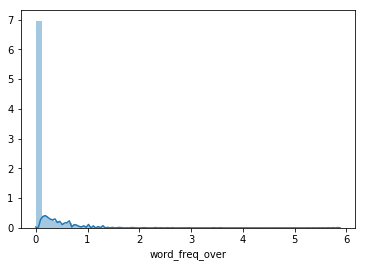

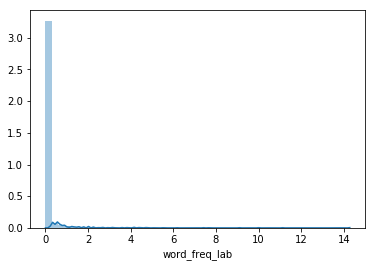

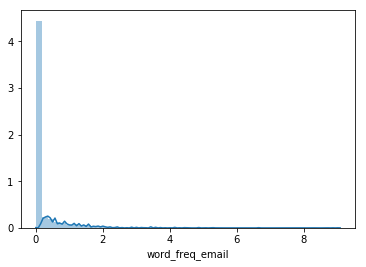

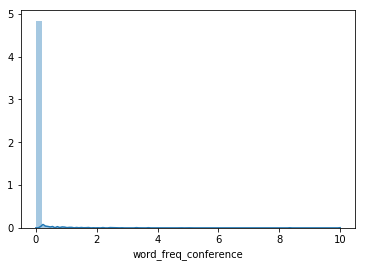

In [10]:
for item in dist:
    sns.distplot(data[item])
    plt.show()

From what we can see, it appears that all the variables are positively skewed. We cannot use Multinomial Naive Bayes classifier with this dataset because it requires that our features' data should be discrete and nominal, which they clearly are not. We cannot use Bernoulli NB because it requires that all the features in in our dataset should have binary values, which, clearly isn't the case. So we are left with Gaussian Naive Bayes, which we will use for our model.

# 4. Modeling

In [11]:
# splitting our dataset into predictior and target variables
X = data.drop(columns = ['spam']).values
y = data['spam'].values
print(X.shape)
print(y.shape)

(4210, 57)
(4210,)


### 4.1 Gaussian Naive Bayes without splitting

In [12]:
# instantiating our classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fitting to our data
model = gnb.fit(X, y)

# making predictions
y_pred = model.predict(X)

# evaluating the algorithm
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.828978622327791


We have gotten an accuracy score of 82.8% which is good.

### 4.2 Gaussian Naive Bayes with train-test splits

In [13]:
my_tests = [0.1, 0.2, 0.3, 0.4, 0.5]

from sklearn.model_selection import train_test_split as tts

for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # fitting to classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # making predictions
    y_pred = clf.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.833729216152019
Test size 0.2 has accuracy score: 0.8420427553444181
Test size 0.3 has accuracy score: 0.833729216152019
Test size 0.4 has accuracy score: 0.834916864608076
Test size 0.5 has accuracy score: 0.833729216152019


From this we see that an 80-20 split yields the highest accuracy score (84.2%)

# 5. Challenging the Solution

### 5.1 Normalizing

Let's see if our models will improve after normalizing them.

##### 5.1.1 Normalizing without Splitting

In [14]:
# splitting our dataset into predictior and target variables
X = data.drop(columns = ['spam']).values
y = data['spam'].values
print(X.shape)
print(y.shape)

(4210, 57)
(4210,)


In [15]:
# normalizing
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X = normal.fit_transform(X)

In [16]:
# instantiating classifier again
gnb = GaussianNB()

# fitting to data
model = gnb.fit(X, y)

# making predictions
y_pred = model.predict(X)

# evaluating the algorithm
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.7717339667458433


Weirdly, the accuracy score went down after normalizing.

##### 5.1.2 Normalizing with Splitting

In [17]:
for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # normalizing
    normal = Normalizer()
    X_train = normal.fit_transform(X_train)
    X_test = normal.transform(X_test)

    # fitting to classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # making predictions
    y_pred = clf.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.7672209026128266
Test size 0.2 has accuracy score: 0.7743467933491687
Test size 0.3 has accuracy score: 0.7640538400633412
Test size 0.4 has accuracy score: 0.7719714964370546
Test size 0.5 has accuracy score: 0.7885985748218527


As with when we didn't split the features and label into training anad test sets, all the accuracy scores for the different test sizes went down after normalizing. The 80-20 split still remains the most accurate one, though.

It is clear that normalizing this dataset is not the best way to optimize our model. We will try a different method, this time removing highly correlated variables.

### 5.2 Removing Multicollinear Variables

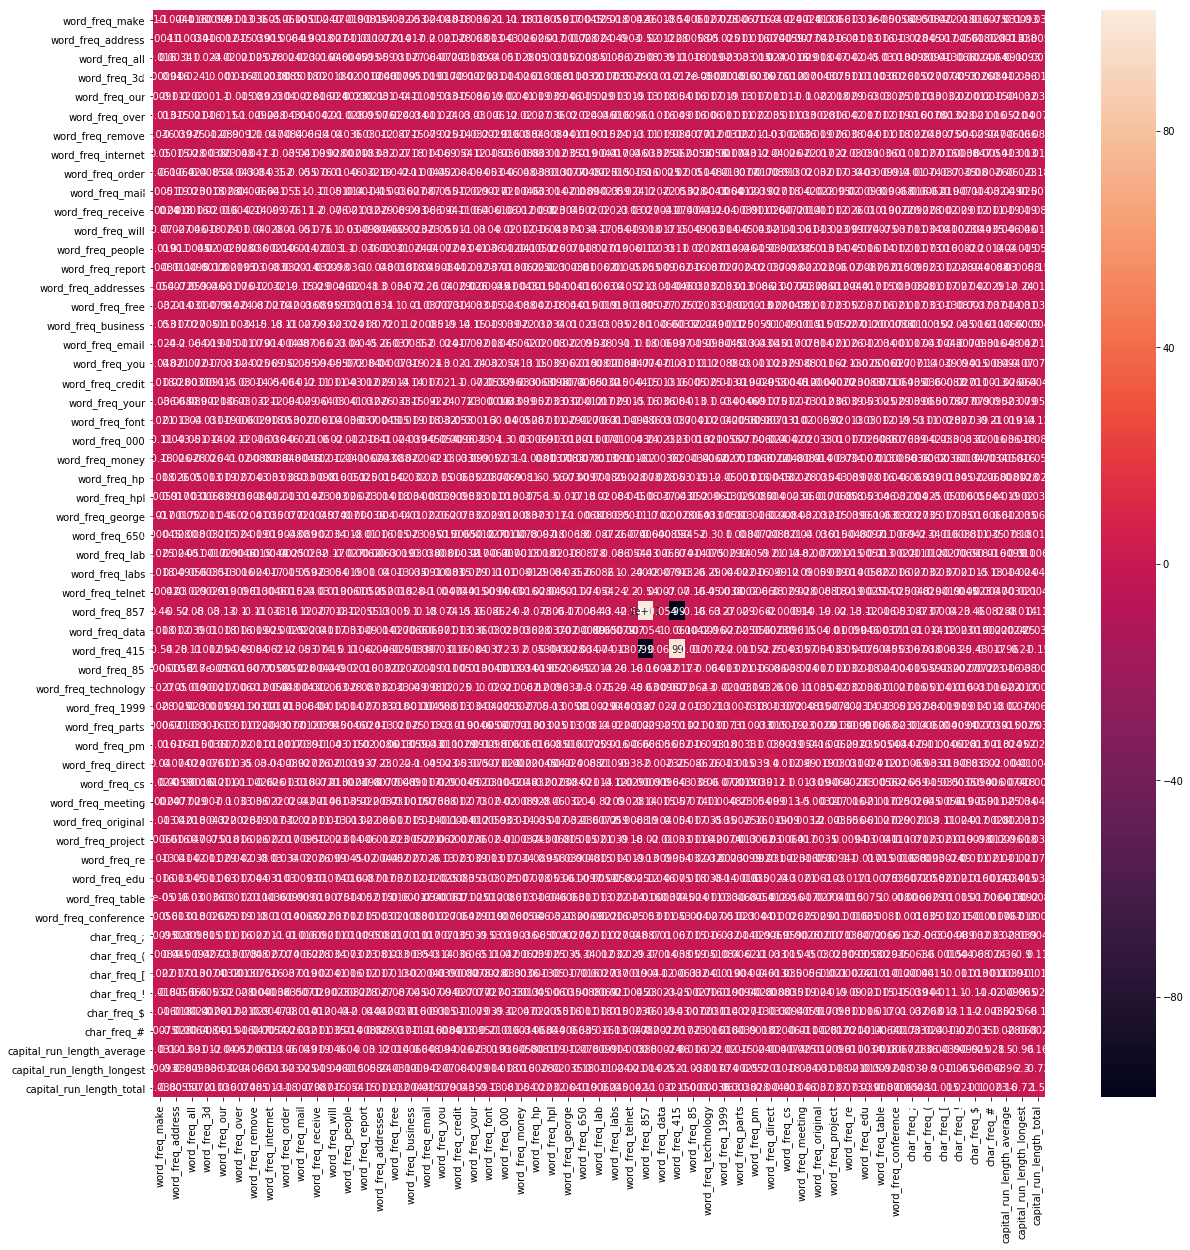

In [18]:
# checking for multicollinearity
corr = data.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (20, 20))
sns.heatmap(vif, annot = True)

Anything that has a VIF score of 5 and above is bound to create problems for our models because of its high multicollinearity. It's hard to see clearly which variable is highly correlated with which, but we can somehow make out that 'word_freq_857' and 'word_freq_415' seem to have ultra high correlation. Let's remove them and see if our VIF scores improve.

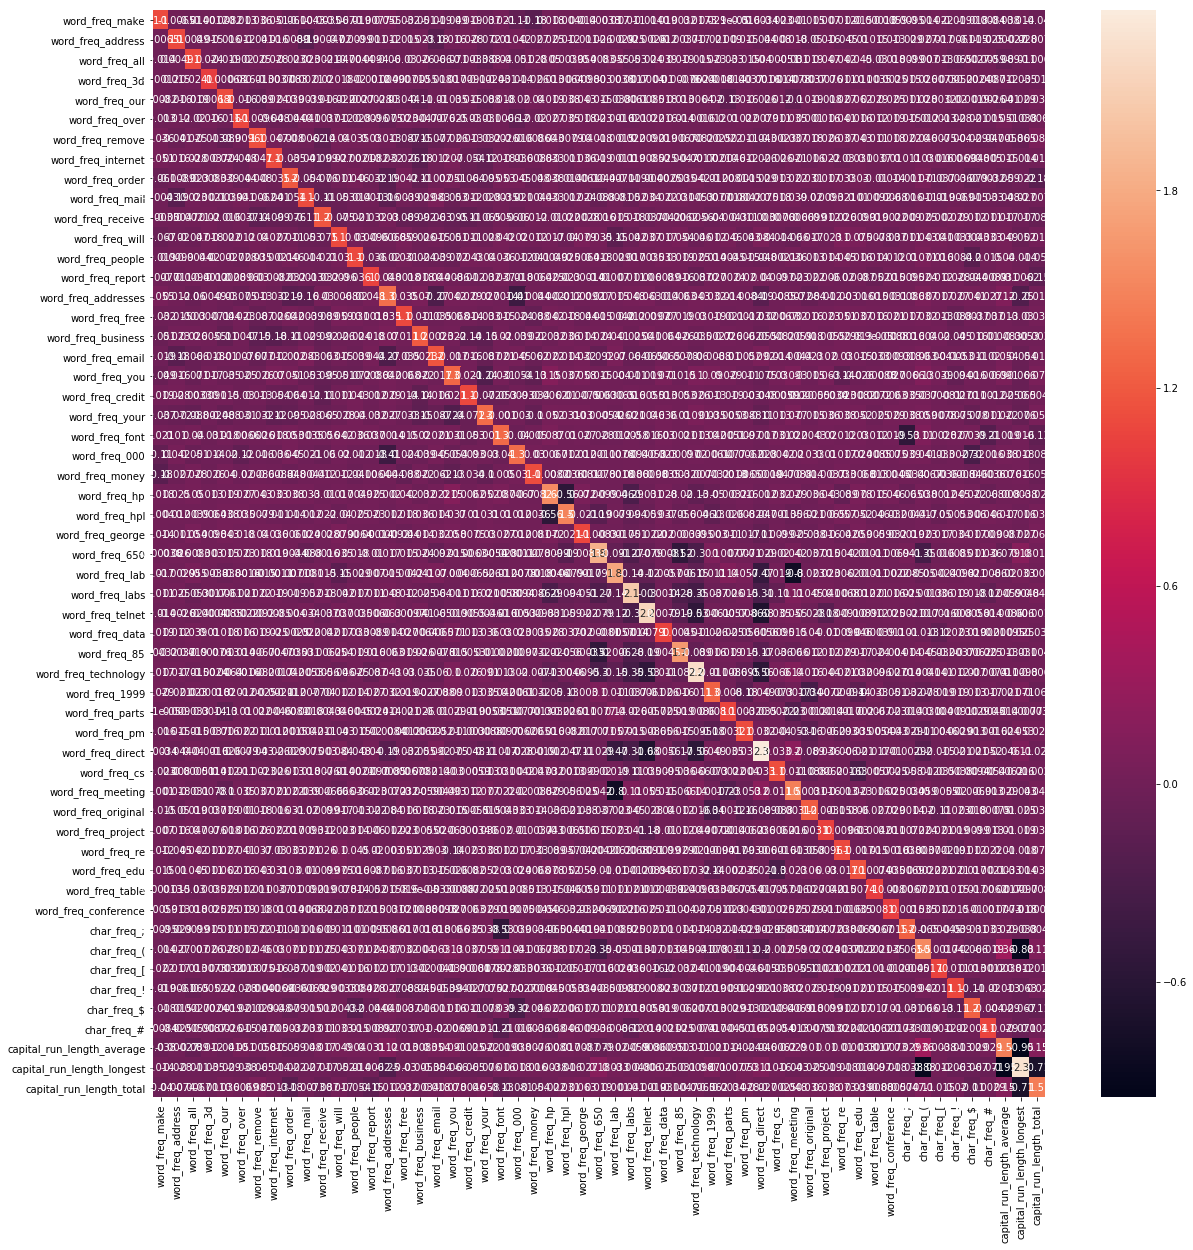

In [19]:
data2 = data.drop(columns = ['word_freq_857', 'word_freq_415'])

corr2 = data2.corr()
vif2 = pd.DataFrame(np.linalg.inv(corr2.values), index = corr2.index, columns = corr2.columns)

# using a heatmap to display the results
plt.figure(figsize = (20, 20))
sns.heatmap(vif2, annot = True)

We can see that our dataset has been greatly improved now that the highly correlated variables have been removed.Let's see how our Gaussian Naive Bayes Classifier will perform now.

##### 5.2.1 Gaussian NB without splitting after removing highly correlated variables

In [20]:
# splitting our dataset into predictior and target variables
X2 = data2.drop(columns = ['spam']).values
y2 = data2['spam'].values
print(X2.shape)
print(y2.shape)

(4210, 55)
(4210,)


In [21]:
# instantiating our classifier
gnb2 = GaussianNB()

# fitting to our data
model2 = gnb2.fit(X2, y2)

# making predictions
y_pred2 = model2.predict(X2)

# evaluating the algorithm
print("Accuracy:", accuracy_score(y2, y_pred2))

Accuracy: 0.8353919239904988


There is a slight improvement in our accuracy score from 82.8% to 83.5%. 

##### 5.2.1 Gaussian NB with splitting after removing highly correlated variables

In [22]:
for test in my_tests:
    X_train2, X_test2, y_train2, y_test2 = tts(X2, y2, test_size = test, random_state = 12)
    
    # fitting to classifier
    clf2 = GaussianNB()
    clf2.fit(X_train2, y_train2)
    
    # making predictions
    y_pred2 = clf2.predict(X_test2)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(y_test2, y_pred2))

Test size 0.1 has accuracy score: 0.8432304038004751
Test size 0.2 has accuracy score: 0.8467933491686461
Test size 0.3 has accuracy score: 0.838479809976247
Test size 0.4 has accuracy score: 0.8426365795724465
Test size 0.5 has accuracy score: 0.8413301662707838


We see that the accuracy scores of all our test sizes have improved and, as expected, the 80-20 split is the most accurate one with a score of 84.6% which is a very slight improvement from the 84.2% one.

# 6. Conclusion